In [1]:
from algorithms.apriori import (
    apriori_frequent_itemsets,
    generate_rules,
    plot_itemset_supports,
)

# Toy market-basket data (10 tx, letters = items)
transactions = [
    ["A", "B", "C", "D"],
    ["B", "C", "E"],
    ["A", "B", "C", "E"],
    ["B", "E"],
    ["A", "B", "C", "D", "E"],
    ["A", "C", "D"],
    ["B", "C", "E"],
    ["A", "B", "C", "E"],
    ["A", "B", "D"],
    ["C", "E"],
]

min_sup = 3  # absolute count
min_conf = 0.6  # 60 %

In [2]:
freq_sets = apriori_frequent_itemsets(transactions, min_support=min_sup, verbose=True)

print(f"\nFound {len(freq_sets)} frequent itemsets (min_sup={min_sup})")
for fs, sup in freq_sets:
    print(set(fs), " sup=", sup)

k=2  candidates=10  freq=0

Found 5 frequent itemsets (min_sup=3)
{frozenset({'A'})}  sup= 0
{frozenset({'D'})}  sup= 0
{frozenset({'B'})}  sup= 0
{frozenset({'C'})}  sup= 0
{frozenset({'E'})}  sup= 0


In [3]:
rules = generate_rules(freq_sets, min_conf=min_conf, n_transactions=len(transactions))

print(f"\nRules (conf ≥ {min_conf:.0%}):")
for r in rules:
    ant = ",".join(sorted(r["antecedent"]))
    cons = ",".join(sorted(r["consequent"]))
    print(
        f"{ant:>5}  →  {cons:<5}   "
        f"sup={r['support']:.2f}  conf={r['confidence']:.2f}  lift={r['lift']:.2f}"
    )


Rules (conf ≥ 60%):


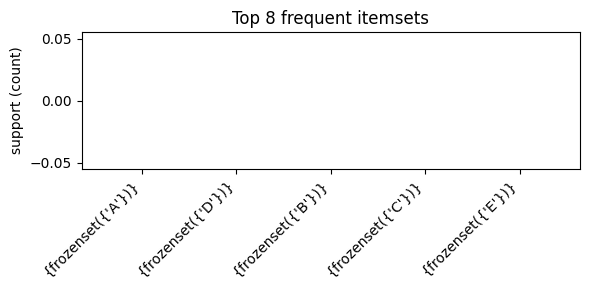

In [4]:
plot_itemset_supports(freq_sets, top_n=8)